# Sonar Issue Analysis
To get a better understanding of using the tags of each commit as a label, they are investigated.

In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import ast

In [2]:
# data import
current_dir = os.getcwd()

# construct path to the project data folder
data_dir = os.path.join(current_dir, '..', '..', 'Data','Sonar_Issues')

# load SonarQube measure data (without duplicates)
df1 = pd.read_csv(os.path.join(data_dir, 'SONAR_ISSUES_v1.csv'))
df2 = pd.read_csv(os.path.join(data_dir, 'SONAR_ISSUES_v2.csv'))

df_inf1 = pd.read_csv(os.path.join(data_dir, 'issues_v1.csv'))
df_inf2 = pd.read_csv(os.path.join(data_dir, 'issues_v2.csv'))

df_tags = pd.read_csv(os.path.join(data_dir, 'tags_analysiskey_v2.csv'))

In [3]:
df2

,PROJECT_ID,CREATION_ANALYSIS_KEY,ISSUE_KEY,TYPE,RULE,SEVERITY,STATUS,RESOLUTION,EFFORT,DEBT,...,MESSAGE,COMPONENT,START_LINE,END_LINE,START_OFFSET,END_OFFSET,HASH,FROM_HOTSPOT,NOT_FOUND,CLOSE_ANALYSIS_KEY
0,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWeF1RcPC4KKKThcBEZ8,CODE_SMELL,squid:S1133,INFO,OPEN,NaN,10.0,10.0,...,Do not forget to remove this deprecated code s...,Apache_Cayenne:framework/cayenne-jdk1.5-unpubl...,39.0,39.0,27.0,37.0,NaN,NaN,0,NaN
1,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWeF1RcRC4KKKThcBEZ9,CODE_SMELL,squid:S1133,INFO,OPEN,NaN,10.0,10.0,...,Do not forget to remove this deprecated code s...,Apache_Cayenne:framework/cayenne-jdk1.5-unpubl...,45.0,45.0,27.0,38.0,NaN,NaN,0,NaN
2,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWeF1RcSC4KKKThcBEZ-,CODE_SMELL,squid:S1133,INFO,OPEN,NaN,10.0,10.0,...,Do not forget to remove this deprecated code s...,Apache_Cayenne:framework/cayenne-jdk1.5-unpubl...,51.0,51.0,24.0,37.0,NaN,NaN,0,NaN
3,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWeF1RcSC4KKKThcBEZ_,CODE_SMELL,squid:S1133,INFO,OPEN,NaN,10.0,10.0,...,Do not forget to remove this deprecated code s...,Apache_Cayenne:framework/cayenne-jdk1.5-unpubl...,59.0,59.0,24.0,38.0,NaN,NaN,0,NaN
4,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWd5_rilC4KKKThc-rwE,CODE_SMELL,squid:S1135,INFO,CLOSED,FIXED,NaN,NaN,...,Complete the task associated to this TODO comm...,Apache_Cayenne:framework/cayenne-jdk1.4-unpubl...,33.0,33.0,0.0,71.0,NaN,NaN,0,AWeF1Ou7C4KKKThcBEZc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024609,org.apache:zookeeper,AWMdqqQTO48jNFNDElBo,AWMdqrV-O48jNFNDElBu,CODE_SMELL,squid:S00117,MINOR,OPEN,NaN,2.0,2.0,...,Rename this local variable to match the regula...,org.apache:zookeeper:src/java/test/org/apache/...,202.0,202.0,18.0,22.0,NaN,NaN,0,NaN
1024610,org.apache:zookeeper,AWMdqqQTO48jNFNDElBo,AWMdqrV-O48jNFNDElBv,BUG,squid:S1143,BLOCKER,OPEN,NaN,30.0,30.0,...,Remove this return statement from this finally...,org.apache:zookeeper:src/java/test/org/apache/...,157.0,157.0,16.0,22.0,NaN,NaN,0,NaN
1024611,org.apache:zookeeper,AWMdqqQTO48jNFNDElBo,AWMdqrV_O48jNFNDElBw,CODE_SMELL,squid:S1161,MAJOR,OPEN,NaN,5.0,5.0,...,"Add the ""@Override"" annotation above this meth...",org.apache:zookeeper:src/java/test/org/apache/...,206.0,206.0,24.0,27.0,NaN,NaN,0,NaN
1024612,org.apache:zookeeper,AWMdqqQTO48jNFNDElBo,AWMdqrV-O48jNFNDElBt,CODE_SMELL,squid:HiddenFieldCheck,MAJOR,OPEN,NaN,5.0,5.0,...,"Rename ""PORT"" which hides the field declared a...",org.apache:zookeeper:src/java/test/org/apache/...,202.0,202.0,18.0,22.0,NaN,NaN,0,NaN


In [4]:
# select rows for which the issue is not fixed yet
df2 = df2[df2["STATUS"] == "OPEN"]

# select rows that describe code smell issues
df2 = df2[df2["TYPE"] == "CODE_SMELL"]

In [5]:
# select columns that are needed to investigate the tags
df2 = df2[["PROJECT_ID", "TYPE", "TAGS", "CREATION_DATE", "CREATION_ANALYSIS_KEY", "MESSAGE"]]
df2

,PROJECT_ID,TYPE,TAGS,CREATION_DATE,CREATION_ANALYSIS_KEY,MESSAGE
0,org.apache:cayenne,CODE_SMELL,obsolete,2007-01-21 11:11:02,AWd5_psxC4KKKThc-qK6,Do not forget to remove this deprecated code s...
1,org.apache:cayenne,CODE_SMELL,obsolete,2007-01-21 11:11:02,AWd5_psxC4KKKThc-qK6,Do not forget to remove this deprecated code s...
2,org.apache:cayenne,CODE_SMELL,obsolete,2007-01-21 11:11:02,AWd5_psxC4KKKThc-qK6,Do not forget to remove this deprecated code s...
3,org.apache:cayenne,CODE_SMELL,obsolete,2007-01-21 11:11:02,AWd5_psxC4KKKThc-qK6,Do not forget to remove this deprecated code s...
5,org.apache:cayenne,CODE_SMELL,cwe,2007-01-21 11:11:02,AWd5_psxC4KKKThc-qK6,Complete the task associated to this TODO comm...
...,...,...,...,...,...,...
1024607,org.apache:zookeeper,CODE_SMELL,pitfall,2016-12-21 22:32:01,AWMdqqQTO48jNFNDElBo,2 duplicated blocks of code must be removed.
1024608,org.apache:zookeeper,CODE_SMELL,"cert,misra,unused",2016-12-21 22:32:01,AWMdqqQTO48jNFNDElBo,Remove this empty statement.
1024609,org.apache:zookeeper,CODE_SMELL,convention,2016-12-21 22:32:01,AWMdqqQTO48jNFNDElBo,Rename this local variable to match the regula...
1024611,org.apache:zookeeper,CODE_SMELL,bad-practice,2016-12-21 22:32:01,AWMdqqQTO48jNFNDElBo,"Add the ""@Override"" annotation above this meth..."


## For how many rows of version 2 data are tags missing?

### Overall Missingness

In [6]:
df2[df2["TAGS"].isnull()]

,PROJECT_ID,TYPE,TAGS,CREATION_DATE,CREATION_ANALYSIS_KEY,MESSAGE
817,org.apache:cayenne,CODE_SMELL,NaN,2007-01-21 11:11:02,AWd5_psxC4KKKThc-qK6,Missing newline after last element
1557,org.apache:cayenne,CODE_SMELL,NaN,2007-01-21 11:11:02,AWd5_psxC4KKKThc-qK6,Start every element on a separate line.
1558,org.apache:cayenne,CODE_SMELL,NaN,2007-01-21 11:11:02,AWd5_psxC4KKKThc-qK6,Missing newline after last element
1559,org.apache:cayenne,CODE_SMELL,NaN,2007-01-21 11:11:02,AWd5_psxC4KKKThc-qK6,Start every element on a separate line.
1560,org.apache:cayenne,CODE_SMELL,NaN,2007-01-21 11:11:02,AWd5_psxC4KKKThc-qK6,Missing newline after last element
...,...,...,...,...,...,...
1021083,org.apache:zookeeper,CODE_SMELL,NaN,2009-03-27 00:30:12,AWMbc8RNpxPbkMlK223T,Start every element on a separate line.
1021084,org.apache:zookeeper,CODE_SMELL,NaN,2009-03-27 00:30:12,AWMbc8RNpxPbkMlK223T,Missing newline after last element
1021085,org.apache:zookeeper,CODE_SMELL,NaN,2009-03-27 00:30:12,AWMbc8RNpxPbkMlK223T,Start every element on a separate line.
1021086,org.apache:zookeeper,CODE_SMELL,NaN,2009-03-27 00:30:12,AWMbc8RNpxPbkMlK223T,Missing newline after last element


In [7]:
len_miss = len(df2[df2["TAGS"].isnull()])
len_all = len(df2)
miss = round(len_miss/len_all,2)
print(f"Missing tags for issues overall: {miss} %")

Missing tags for issues overall: 0.11 %


### Missingness per project

In [8]:
df2.groupby('PROJECT_ID')['TAGS'].apply(lambda x: x.isnull().sum())

PROJECT_ID
org.apache:archiva                 41
org.apache:batik                 1137
org.apache:bcel                   168
org.apache:beanutils              183
org.apache:cayenne               2320
org.apache:cocoon                6642
org.apache:codec                  138
org.apache:collections              5
org.apache:commons-cli              0
org.apache:commons-exec           103
org.apache:commons-fileupload       0
org.apache:commons-io               3
org.apache:commons-jexl           198
org.apache:configuration         1389
org.apache:daemon                 218
org.apache:dbcp                     3
org.apache:dbutils                  0
org.apache:digester                68
org.apache:felix                  358
org.apache:hive                  2109
org.apache:httpclient               2
org.apache:httpcore                 1
org.apache:jxpath                 254
org.apache:net                    135
org.apache:ognl                   619
org.apache:santuario             7221
o

In [9]:
def percentage_missing(series):
    total_count = len(series)
    missing_count = series.isnull().sum()
    if total_count == 0:
        return 0.0
    return round((missing_count / total_count) * 100,2)

percentage_missing_tags_by_project = df2.groupby('PROJECT_ID')['TAGS'].apply(percentage_missing)
percentage_missing_tags_by_project

PROJECT_ID
org.apache:archiva                0.43
org.apache:batik                  8.16
org.apache:bcel                   3.75
org.apache:beanutils              5.31
org.apache:cayenne               17.84
org.apache:cocoon                20.93
org.apache:codec                  9.88
org.apache:collections            0.15
org.apache:commons-cli            0.00
org.apache:commons-exec          18.49
org.apache:commons-fileupload     0.00
org.apache:commons-io             0.16
org.apache:commons-jexl          13.94
org.apache:configuration         38.17
org.apache:daemon                31.41
org.apache:dbcp                   0.35
org.apache:dbutils                0.00
org.apache:digester              50.75
org.apache:felix                  1.11
org.apache:hive                   3.68
org.apache:httpclient             0.07
org.apache:httpcore               0.03
org.apache:jxpath                 8.22
org.apache:net                    5.70
org.apache:ognl                  32.22
org.apache:san

For most projects, only a small percentage of tags are missing. <br>
However, for Digester and Santuario around half of rows have no tags. <br>
For Configuration, Daemon and Ognl there are 30-40% missing.

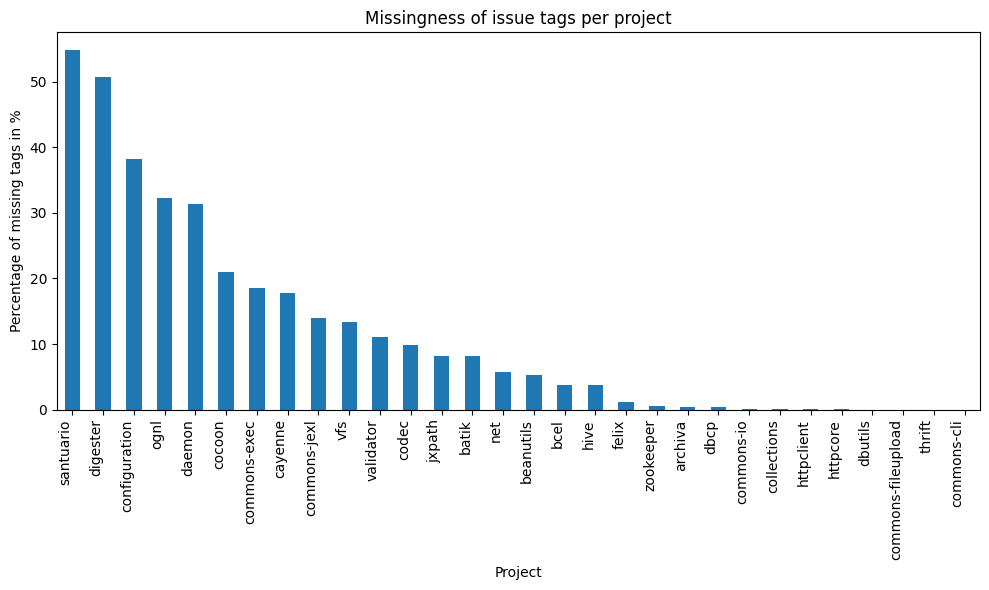

In [10]:
# remove "org.apache:" from names to improve readability
modified_index = percentage_missing_tags_by_project.index.str.replace("org.apache:", "")
percentage_missing_tags_by_project.index = modified_index

# barplot of percent missingness per project in descending order
plt.figure(figsize=(10, 6))
percentage_missing_tags_by_project.sort_values(ascending = False).plot(kind='bar')
plt.xlabel('Project')
plt.ylabel('Percentage of missing tags in %')
plt.title('Missingness of issue tags per project')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

## Investigating the distribution of labels in the dataset
In the cleaning of the issues a dataset has been created that associates each analysis key with the tags given for the found code smells. These are the labels.

In [18]:
def convert_string_to_list(list_string):
    """Safely evaluates a string representation of a list."""
    try:
        return ast.literal_eval(list_string)
    except (SyntaxError, ValueError):
        return []  # Or handle the error as you see fit

df_tags['UNIQUE_TAGS'] = df_tags['UNIQUE_TAGS'].apply(convert_string_to_list)

# Now, df['UNIQUE_TAGS'] will contain actual Python lists
print(df_tags['UNIQUE_TAGS'].iloc[0])

['bad-practice', 'suspicious', 'error-handling', 'cert']


In [19]:
tag_list = df_tags["UNIQUE_TAGS"].to_list()
tag_list

[['bad-practice', 'suspicious', 'error-handling', 'cert'],
 ['clumsy'],
 ['bad-practice'],
 ['design'],
 ['pitfall', 'cert'],
 ['clumsy', 'unused', 'redundant'],
 ['bad-practice'],
 ['error-handling',
  'redundant',
  'clumsy',
  'unused',
  'cert',
  'suspicious',
  'brain-overload',
  'convention'],
 ['pitfall'],
 ['error-handling',
  'code-smell',
  'redundant',
  'clumsy',
  'unused',
  'antipattern',
  'cert',
  'suspicious',
  'convention'],
 ['bad-practice', 'design'],
 ['bad-practice', 'cert'],
 ['pitfall',
  'error-handling',
  'unused',
  'suspicious',
  'cwe',
  'cert',
  'brain-overload',
  'design',
  'convention',
  'misra'],
 ['error-handling', 'code-smell', 'cwe', 'antipattern', 'cert', 'convention'],
 ['bad-practice', 'cert'],
 ['suspicious', 'error-handling', 'cert'],
 ['suspicious', 'brain-overload', 'error-handling', 'cert'],
 ['pitfall', 'cert'],
 ['brain-overload'],
 ['pitfall',
  'redundant',
  'clumsy',
  'confusing',
  'unused',
  'brain-overload',
  'conventio

In [20]:
len(tag_list)

9693

In [21]:
all_items = [item for sublist in tag_list for item in sublist]
category_counts = Counter(all_items)
category_counts

Counter({'cert': 4192,
         'convention': 3583,
         'error-handling': 3230,
         'cwe': 2570,
         'suspicious': 2554,
         'design': 2392,
         'pitfall': 2372,
         'brain-overload': 2369,
         'unused': 2283,
         'misra': 2002,
         'bad-practice': 1765,
         'code-smell': 1660,
         'antipattern': 1660,
         'clumsy': 1570,
         'performance': 687,
         'redundant': 675,
         'obsolete': 363,
         'style': 352,
         'confusing': 324,
         'java8': 192,
         'html5': 58,
         'browser-compatibility': 40,
         'serialization': 35,
         'format': 34,
         'multi-threading': 24,
         'unpredictable': 24,
         'lock-in': 20,
         'psr2': 5,
         'sql': 4,
         'cross-browser': 1,
         'user-experience': 1})

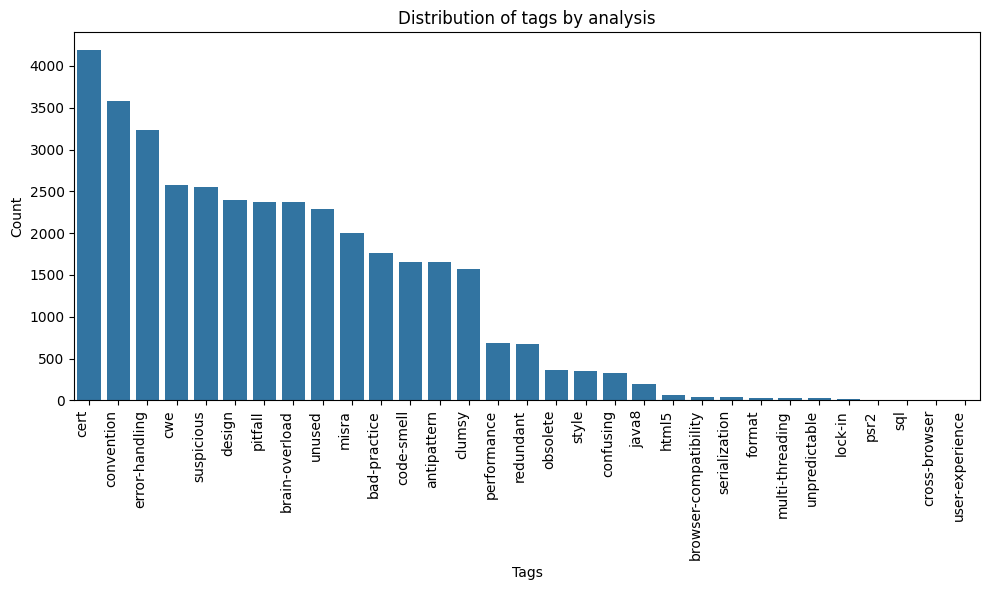

In [22]:
# transform the counter into a dataframe to prepare it for plotting
df_count = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])
# sort values by count to rank them by occurence
df_count = df_count.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=df_count)
plt.xticks(rotation=90, ha='right')
plt.title('Distribution of tags by analysis')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

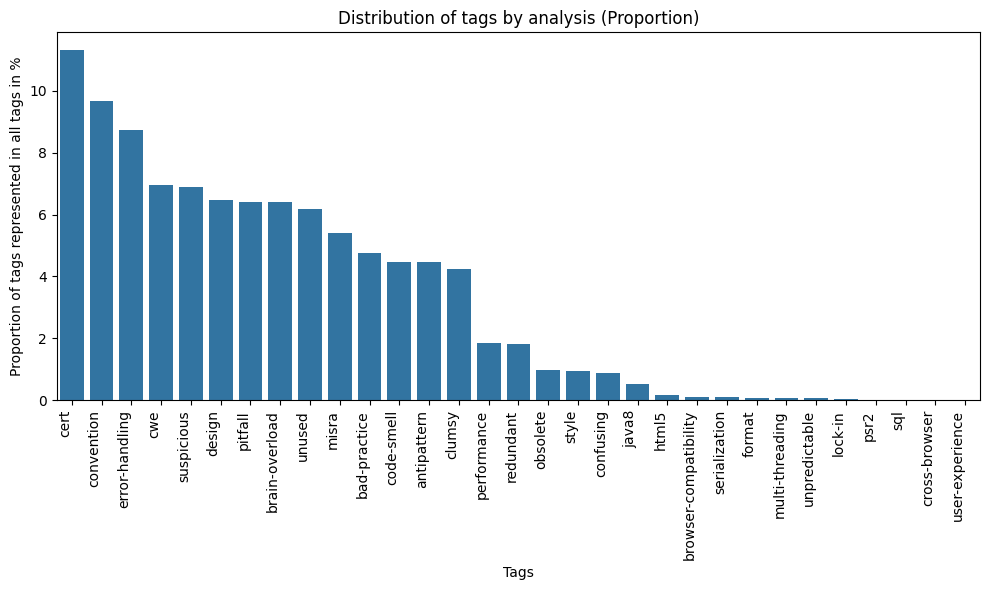

In [23]:
total_count = df_count['Count'].sum()
df_count['Percentage'] = (df_count['Count'] / total_count) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Percentage', data=df_count)
plt.xticks(rotation=90, ha='right')
plt.title('Distribution of tags by analysis (Proportion)')
plt.xlabel('Tags')
plt.ylabel('Proportion of tags represented in all tags in %')
plt.tight_layout()
plt.show()

A lot of the variables are often represented proportionally. However, there is also a tail of tags that rarely occur
and that will be tough to predict since they're underrepresented. <br>
Furthermore, CERT, CWE and MISRA tags are given for the violation of rule sets that describe a coding standard violation rather than a specific issue ([SonarQube Tag Documentation](https://docs.sonarsource.com/sonarqube-server/9.8/user-guide/rules/built-in-rule-tags/)).